In [12]:
import Pkg
Pkg.add("ABCredit")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("BeforeIT")


   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
   Installed BitIntegers ─ v0.3.7
   Installed BeforeIT ──── v0.5.0
    Updating `~/.julia/environments/v1.12/Project.toml`
  [ca9fcad7] + BeforeIT v0.5.0
    Updating `~/.julia/environments/v1.12/Manifest.toml`
  [4c555306] + ArrayLayouts v1.12.2
  [ca9fcad7] + BeforeIT v0.5.0
  [c3b6d118] + BitIntegers v

## ABCredit (simple ABM)

ABCredit.jl is a fast and easy-to-use Julia implementation of the macroeconomic agent-based model described in _Emergent dynamics of a macroeconomic agent based model with capital and credit_; it can simulate the original model or serve as a base for extensions. https://github.com/bancaditalia/ABCredit.jl/tree/main

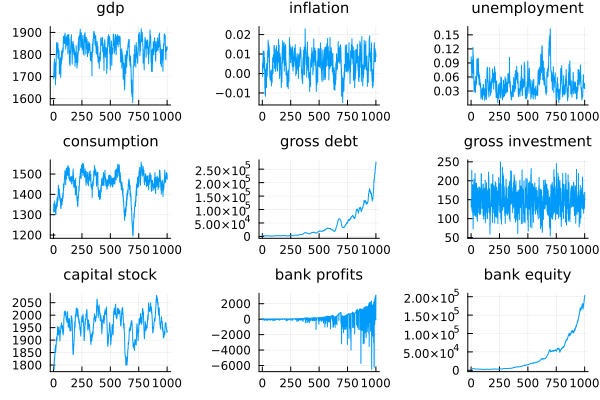

In [4]:
using ABCredit
using Statistics, Plots

# We then select the number of workers (W), the number of firms that produce consumption goods (F), 
# and the number of firms that produe capital goods (N).

W = 1000
F = 100
N = 20

# The other parameters of the model are stored in a dictionary. 
# Some standard parametrisations like the original one are readily available from the library.

params = ABCredit.PARAMS_ORIGINAL

# We can not initialise our model

model = ABCredit.initialise_model(W, F, N; params);

# Note that, after initialisation, the parameters of the model are accessible and modifiable as attributes of the model object.
# Here, for instance, we set the tax rate to 0.1

model.params[:tax_rate] = 0.0
model.params[:subsidy] = 0.0

# Now we run the mdel for T epochs, the results simulation will output a data collector "d" with several time series.

T = 1000
d = ABCredit.run_one_sim!(model, T; seed = 100, burn_in = 100)

# If needed, we can save the simulation data to a CSV file as

ABCredit.save_csv(d, "data.csv")

# Now we can plot some of the store time series

p1 = plot(d.Y_real, title = "gdp", titlefont = 10)
p2 = plot(d.inflationRate, title = "inflation", titlefont = 10)
p3 = plot(d.Un, title = "unemployment", titlefont = 10)
p4 = plot(d.consumption, title = "consumption", titlefont = 10)
p5 = plot(d.totalDeb, title = "gross debt", titlefont = 10)
p6 = plot(d.Investment, title = "gross investment", titlefont = 10)
p7 = plot(d.totK, title = "capital stock", titlefont = 10)
p8 = plot(d.profitsB, title = "bank profits", titlefont = 10)
p9 = plot(d.E, title = "bank equity", titlefont = 10)

plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)


## BeforeIT (large-scale model)

BeforeIT.jl is a Julia framework for behavioural agent-based economic forecasting, based on the model in _Economic forecasting with an agent-based model_; it supports counterfactual analysis, is modular for extensions, and ships with calibrated parametrisations (e.g., Austria and Italy). https://github.com/bancaditalia/BeforeIT.jl

In [27]:
# We start by importing the BeforeIT library and other useful libraries.
import BeforeIT as Bit
using Plots, StatsPlots

# We then initialise the model loading some precomputed set of parameters and by specifying a number of epochs.
# In another tutorial we will illustrate how to compute parameters and initial conditions.

parameters = Bit.AUSTRIA2010Q1.parameters
initial_conditions = Bit.AUSTRIA2010Q1.initial_conditions

# We can now initialise the model
model = Bit.Model(parameters, initial_conditions);


In [28]:
# Note that the it is very simple to inspect the model by typing
println(fieldnames(typeof(model)))

# and to inspect the specific attributes of one agent type by typing
println(fieldnames(typeof(model.bank)))


(:w_act, :w_inact, :firms, :bank, :cb, :gov, :rotw, :agg, :prop, :data)
(:E_k, :Pi_k, :Pi_e_k, :D_k, :r, :Y_h, :C_d_h, :I_d_h, :C_h, :I_h, :K_h, :D_h)


In [32]:
# Run the model for 20 quarters
T = 20
Bit.run!(model, T)

BeforeIT.Model{BeforeIT.Workers, BeforeIT.Workers, BeforeIT.Firms, BeforeIT.Bank, BeforeIT.CentralBank, BeforeIT.Government, BeforeIT.RestOfTheWorld, BeforeIT.Aggregates, BeforeIT.Properties, BeforeIT.Data}(BeforeIT.Workers(Base.RefValue{Bool}(false), Base.RefValue{Int64}(4118), Dict{Int64, Int64}(), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118], [0.900548734248397, 0.9013560749413745, 0.9007142843582898, 0.9005831314693916, 0.8570588723221896, 0.8570588723221896, 0.8570588723221896, 0.9211820050230369, 0.9211820050230369, 0.9211820050230369  …  6.892571304006026, 4.851283595565987, 3.7108921588981305, 7.769778867247302, 6.186419416417132, 7.581539804557003, 3.6177906022694963, 6.819581507988187, 0.8906300318624113, 9.319598563679815], [5.193218252897631, 5.093892914194702, 5.183889755543944, 5.167221680521244, 5.181807455587408, 5.145213795611271, 5.198772183349828, 5.178664744691712, 5.165425227493811, 5.212858358347027  …  32.91769763

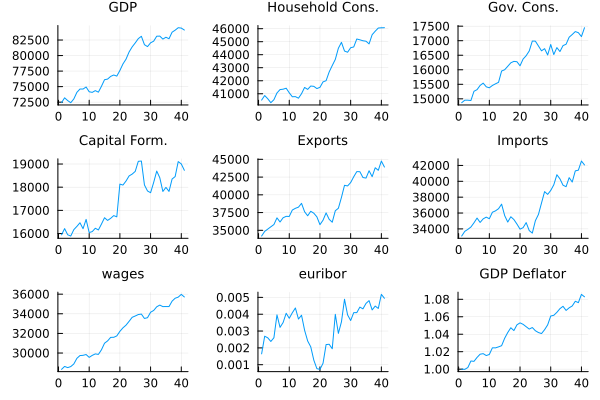

In [33]:
# Note that we can equivalently run the model for a number of steps in the single command
# `Bit.run!(model)`, but writing the loop explicitely is more instructive.
# We can then plot any time series stored in the data tracker, for example
plot(model.data.real_gdp, title = "gdp", titlefont = 10)

# Or we can plot multiple time series at once using the function `plot_data`
ps = Bit.plot_data(model, quantities = [:real_gdp, :real_household_consumption, :real_government_consumption, :real_capitalformation, :real_exports, :real_imports, :wages, :euribor, :gdp_deflator])
plot(ps..., layout = (3, 3))


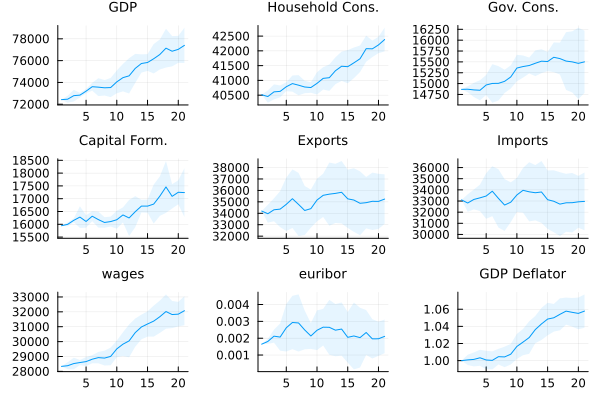

In [34]:
# To run multiple Monte-Carlo repetitions in parallel we can use
models = (Bit.Model(parameters, initial_conditions) for _ in 1:4)
models = Bit.ensemblerun!(models, T)

# Note that we can equivalently run n_sims models for T steps in the single command
# `Bit.ensemblerun(model, T, n_sims)`.

# Note that this will use the number of threads specified when activating the Julia environment.
# To discover the number of threads available, you can use the command
Threads.nthreads()

# To activate Julia with a specific number of threads, say 8, you can use the command
# `julia -t 8` in the terminal.
# We can then plot the results of the monte-carlo repetitions using the function `plot_data_vector`
ps = Bit.plot_data_vector(models)
plot(ps..., layout = (3, 3))